<a href="https://colab.research.google.com/github/aureliosaraiva/ia-test/blob/main/Wine_Type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
url_red_wine = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
url_white_wine = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

red_wine = pd.read_csv(url_red_wine, sep=';')
white_wine = pd.read_csv(url_white_wine, sep=';')

red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

wine_data = pd.concat([red_wine, white_wine], axis=0).reset_index(drop=True)

print(wine_data.info())
print(wine_data.describe())



Primeiras linhas do dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wine_type  
0      9.4        5      

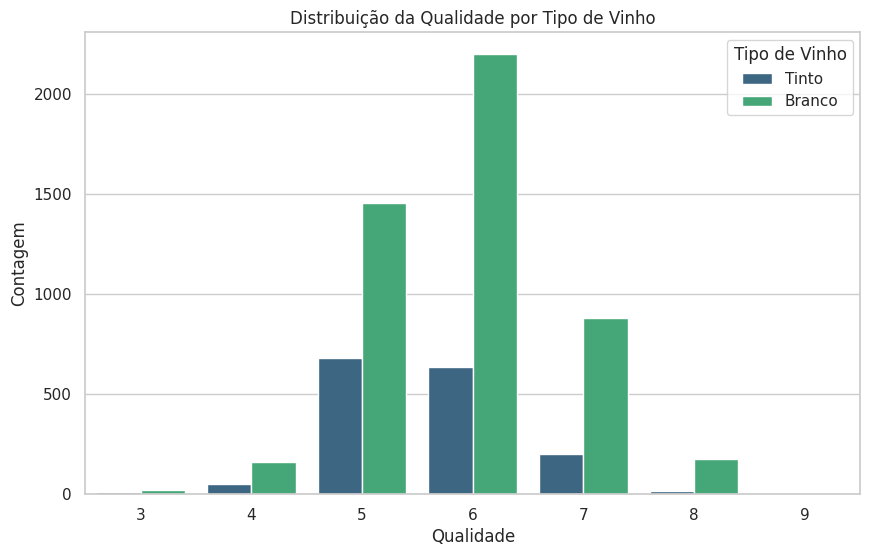

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(data=wine_data, x='quality', hue='wine_type', palette='viridis')
plt.title('Distribuição da Qualidade por Tipo de Vinho')
plt.xlabel('Qualidade')
plt.ylabel('Contagem')
plt.legend(title='Tipo de Vinho', labels=['Tinto', 'Branco'])
plt.show()

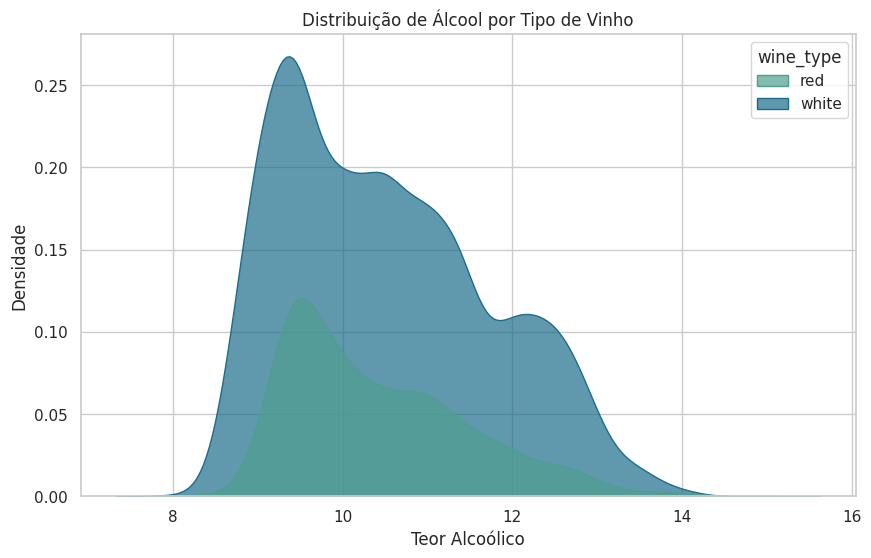

In [ ]:

plt.figure(figsize=(10, 6))
sns.kdeplot(data=wine_data, x='alcohol', hue='wine_type', fill=True, palette='crest', alpha=0.7)
plt.title('Distribuição de Álcool por Tipo de Vinho')
plt.xlabel('Teor Alcoólico')
plt.ylabel('Densidade')
plt.show()

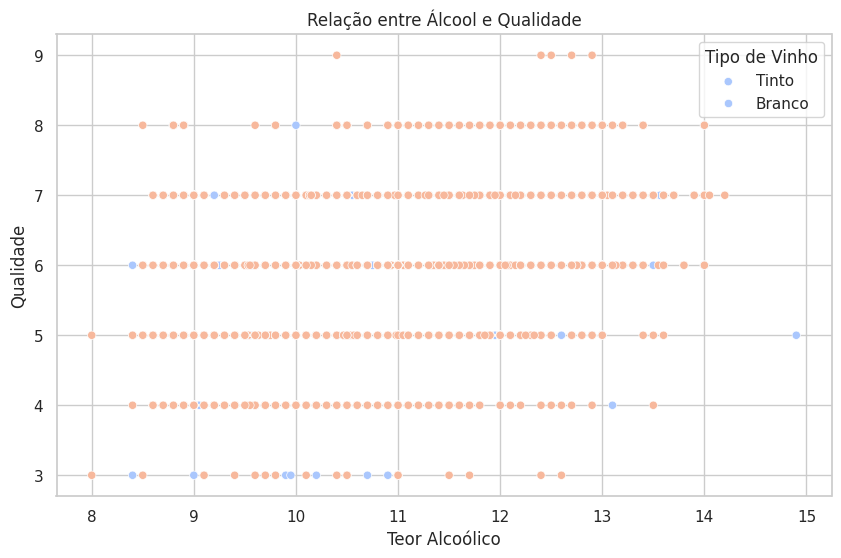

In [ ]:
# 2.4 Relação entre Álcool e Qualidade
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wine_data, x='alcohol', y='quality', hue='wine_type', palette='coolwarm')
plt.title('Relação entre Álcool e Qualidade')
plt.xlabel('Teor Alcoólico')
plt.ylabel('Qualidade')
plt.legend(title='Tipo de Vinho', labels=['Tinto', 'Branco'])
plt.show()

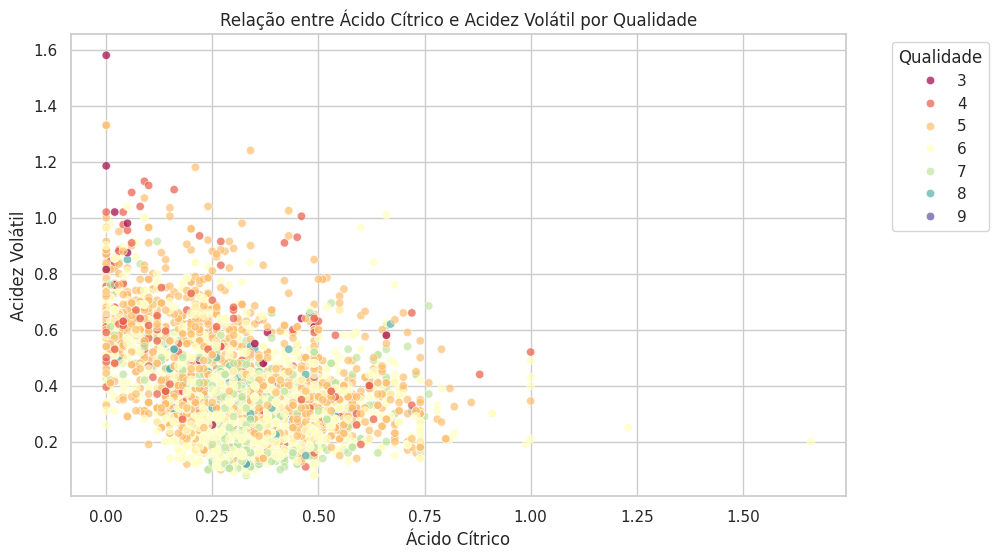

In [ ]:
# 2.7 Relação entre Ácido Cítrico e Acidez Volátil por Qualidade
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wine_data, x='citric acid', y='volatile acidity', hue='quality', palette='Spectral', alpha=0.7)
plt.title('Relação entre Ácido Cítrico e Acidez Volátil por Qualidade')
plt.xlabel('Ácido Cítrico')
plt.ylabel('Acidez Volátil')
plt.legend(title='Qualidade', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [ ]:
print("\nValores nulos no dataset:")
print(wine_data.isnull().sum())


Valores nulos no dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64


In [ ]:
wine_data['wine_type'] = wine_data['wine_type'].map({'red': 0, 'white': 1})

X = wine_data.drop(columns=['quality'])
y = wine_data['quality']

print("\nDistribuição das classes antes do balanceamento:")
print(y.value_counts())

# Combinar classes de qualidade 3, 4, 5 como 'Baixa', 6 como 'Média' e 7, 8, 9 como 'Alta' qualidade
y = y.apply(lambda x: 'Baixa' if x <= 5 else ('Média' if x == 6 else 'Alta'))

print("\nDistribuição das classes após reclassificação:")
print(y.value_counts())


Distribuição das classes antes do balanceamento:
quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

Distribuição das classes após reclassificação:
quality
Média    2836
Baixa    2384
Alta     1277
Name: count, dtype: int64


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rfc = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
print("\nMelhores parâmetros encontrados:")
print(grid_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Melhores parâmetros encontrados:
{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

        Alta       0.78      0.60      0.68       383
       Baixa       0.77      0.75      0.76       716
       Média       0.67      0.75      0.71       851

    accuracy                           0.72      1950
   macro avg       0.74      0.70      0.72      1950
weighted avg       0.73      0.72      0.72      1950



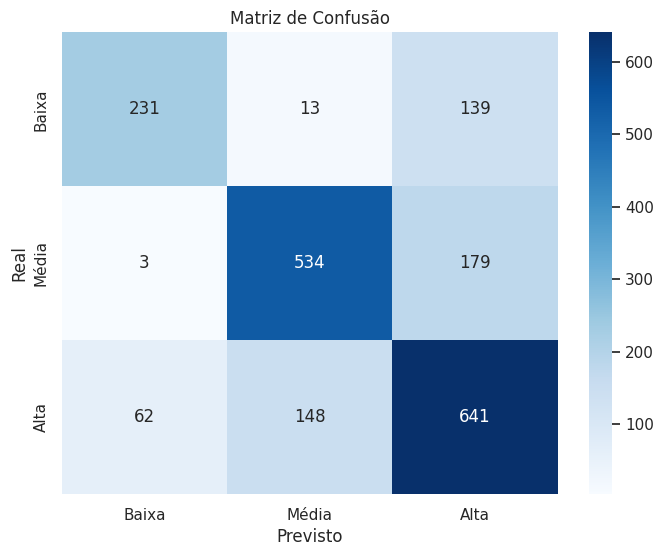

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Baixa', 'Média', 'Alta'], yticklabels=['Baixa', 'Média', 'Alta'])
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

Acurácia do Modelo: 0.72


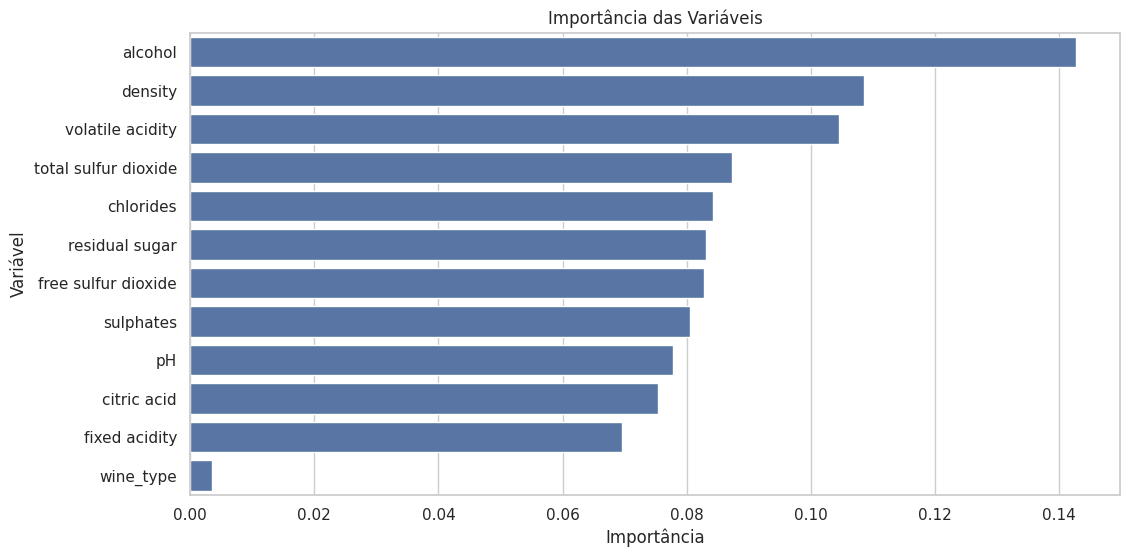

In [ ]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do Modelo: {accuracy:.2f}")

feature_importances = pd.Series(best_model.feature_importances_, index=wine_data.drop(
    columns=['quality']).columns).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Importância das Variáveis')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()